## Visualization of Cleaned Customer Review Data

The visualizations in this notebook are based on the **cleaned and preprocessed dataset**.  
The raw data was first cleaned in Python, then stored and explored in **PostgreSQL** to derive key business insights.  
Some of the most meaningful insights discovered through SQL analysis have been brought back here and visualized to better understand customer sentiment and purchasing behavior.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [2]:
df = pd.read_csv("cleaned_customer_reviews_sentiment.csv")

df.head()

,ReviewID,CustomerID,ProductID,ReviewText,ReviewDate,CleanReview,ReviewLength,Year,Month,Weekday,SentimentScore,SentimentLabel
0,1,486,267,So impressed by the quality. This product trul...,2024-05-12,impressed quality product truly delivers,5,2024,5,Sunday,1.000000,Positive
1,2,810,246,I'm very happy with the performance. It does e...,2024-03-07,happy performance exactly need,4,2024,3,Thursday,0.525000,Positive
2,3,855,291,I regret buying this. The quality is terrible ...,2023-11-15,regret buying quality terrible stopped working...,8,2023,11,Wednesday,-1.000000,Negative
3,4,524,235,"It serves its purpose, but it's not anything e...",2024-05-27,serves purpose not anything extraordinary,5,2024,5,Monday,0.333333,Positive
4,5,238,220,Very high-quality product. I would buy it agai...,2023-09-10,high quality product would buy without hesitation,7,2023,9,Sunday,0.160000,Positive


# Visualization 1
## Overall Sentiment Distribution (Bar Chart)
### This answers: How many Positive/Neutral/Negative reviews exists

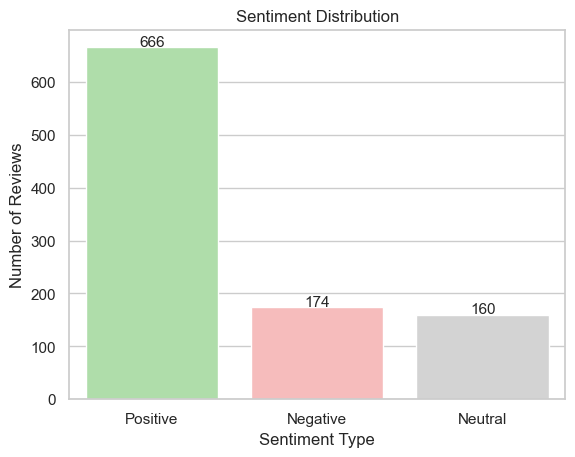

In [8]:
# 1 - count sentiment values
sentiment_counts = df["SentimentLabel"].value_counts()

# 2 - sort in desc order
sentiment_counts = sentiment_counts.sort_values(ascending=False)

# 3 - choose colors in same order
color_map = {
    "Positive": "#A8E6A1",  # pastel green
    "Negative": "#FFB3B3",  # pastel red
    "Neutral": "#D3D3D3"  # light grey
}
colors = [color_map[x] for x in sentiment_counts.index]

# 4 - create chart
plt.figure(figure=(7,5))
sns.barplot(x=sentiment_counts.index, 
            y=sentiment_counts.values,
            palette=colors
           )

# 5 - Titles & labels
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment Type")
plt.ylabel("Number of Reviews")

# 6 - Add values on top
for i, values in enumerate(sentiment_counts.values):
    plt.text(i, values + 2, str(values), ha='center',fontsize=11)


plt.show()

# Visualization 2
## Sentiment Percentage (Pie Chart)

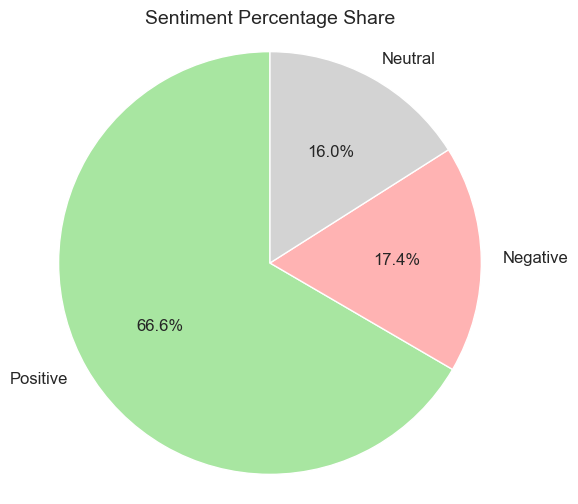

In [9]:
# 1 — Count sentiment values
sentiment_counts = df["SentimentLabel"].value_counts()

# 2 — Sort in DESC order (so biggest slice first)
sentiment_counts = sentiment_counts.sort_values(ascending=False)

# 3 — Pastel color map
color_map = {
    "Positive": "#A8E6A1",   # pastel green
    "Neutral":  "#D3D3D3",   # soft grey
    "Negative": "#FFB3B3"    # pastel red
}

colors = [color_map[x] for x in sentiment_counts.index]

# 4 — Create pie chart
plt.figure(figsize=(6,6))
plt.pie(
    sentiment_counts,
    labels=sentiment_counts.index,
    autopct='%1.1f%%',
    startangle=90,     # rotates chart for nicer look
    colors=colors,
    textprops={'fontsize': 12}
)

plt.title("Sentiment Percentage Share", fontsize=14)
plt.axis('equal')   # makes the pie a circle
plt.show()

# Visualization 3
## Top 10 Products with the Most Positive Reviews (Bar Chart)
### This answers: Which products receive the highest number of positive customer reviews?

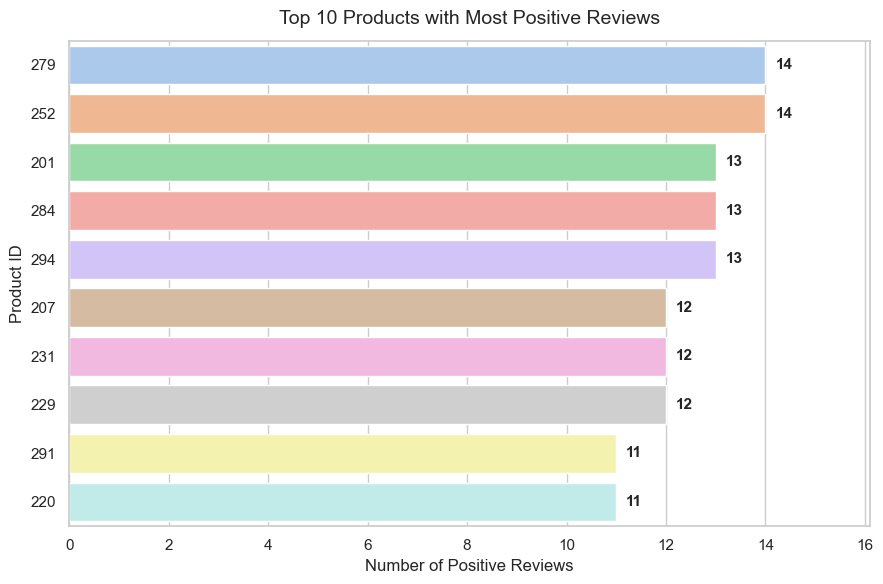

In [16]:

# 1 — Count positive reviews per product
top_positive = (
    df[df["SentimentLabel"] == "Positive"]["ProductID"]
    .value_counts()
    .head(10)
)

# 2 — Create bar chart
plt.figure(figsize=(9,6))
sns.barplot(
    x=top_positive.values,
    y=top_positive.index.astype(str),   # ensure clean labels
    palette="pastel"
)

# 3 — Titles & axis labels
plt.title("Top 10 Products with Most Positive Reviews", fontsize=14, pad=12)
plt.xlabel("Number of Positive Reviews", fontsize=12)
plt.ylabel("Product ID", fontsize=12)

# 4 — Add value labels beside bars
for i, value in enumerate(top_positive.values):
    plt.text(value + 0.2, i, str(int(value)), 
             va='center', fontsize=11, fontweight='bold')

# 5 — Improve spacing
plt.xlim(0, max(top_positive.values)*1.15)
plt.tight_layout()

# 6 — Show plot
plt.show()


# Visualization 4
## Top 10 Products with the Most Negative Reviews (Bar Chart)
### This answers: Which products are customers most unhappy with?

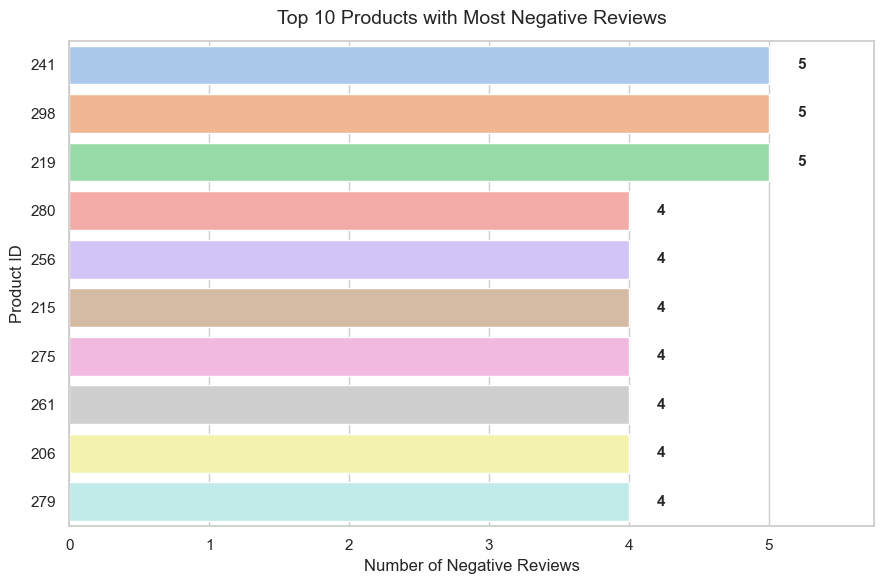

In [17]:
# 1 - count negative reviews per product
top_negative = (
    df[df["SentimentLabel"]=='Negative']["ProductID"]
    .value_counts()
    .head(10)
)

# 2 - create bar chart
plt.figure(figsize=(9,6))
sns.barplot(
    x=top_negative.values,
    y=top_negative.index.astype(str),
    palette="pastel"
)

# 3 - Titles and Labels
plt.title("Top 10 Products with Most Negative Reviews", fontsize=14, pad=12)
plt.xlabel("Number of Negative Reviews", fontsize=12)
plt.ylabel("Product ID", fontsize=12)

# 4 - Add value labels beside bars
for i, value in enumerate(top_negative.values):
    plt.text(value + 0.2, i, str(int(value)),
             va='center', fontsize=11, fontweight='bold')

# 5 - Improve spacing
plt.xlim(0, max(top_negative.values)*1.15)
plt.tight_layout()

# 6 - show plot
plt.show()

# Visualization 5
## Top 10 Products by Average Sentiment Score (Bar Chart)
### This answers: Which products are truly the best rated — not just popular?

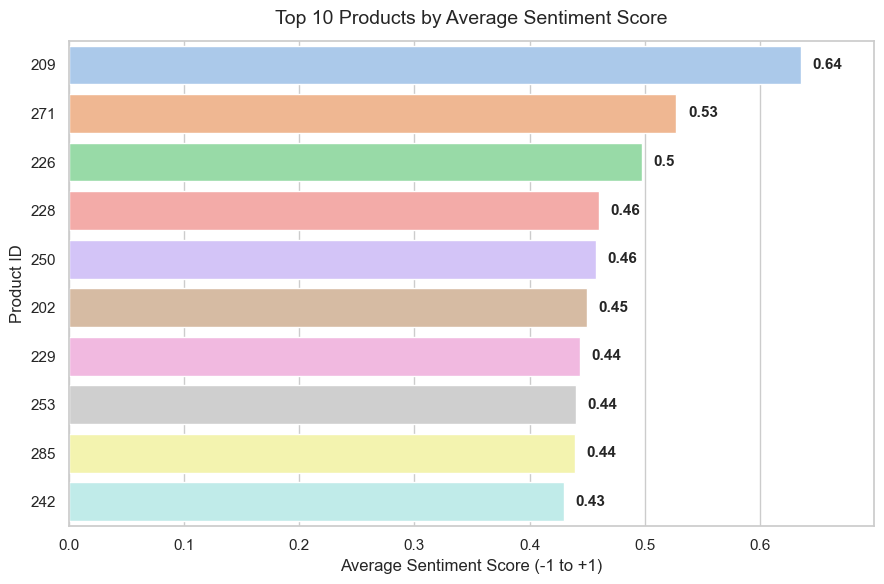

In [18]:
# 1 - calculate avg sentiment score per product
avg_sentiment = (
    df.groupby("ProductID")["SentimentScore"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

# 2 - create bar chart
plt.figure(figsize=(9,6))
sns.barplot(
    x=avg_sentiment.values,
    y=avg_sentiment.index.astype(str),
    palette='pastel'
)

# 3 - Titles and Labels
plt.title("Top 10 Products by Average Sentiment Score", fontsize=14, pad=12)
plt.xlabel("Average Sentiment Score (-1 to +1)", fontsize=12)
plt.ylabel("Product ID", fontsize=12)

# 4 - Add value labels beside bars
for i, value in enumerate(avg_sentiment.values):
    label = round(value, 2)
    plt.text(value + 0.01, i, label, va='center', fontsize=11, fontweight='bold')

# 5 - improve spacing
plt.xlim(min(0, avg_sentiment.values.min()-0.05), max(avg_sentiment.values)*1.1)
plt.tight_layout()

# 6 - show chart
plt.show()

In [20]:
df.dtypes

ReviewID            int64
CustomerID          int64
ProductID           int64
ReviewText         object
ReviewDate         object
CleanReview        object
ReviewLength        int64
Year                int64
Month               int64
Weekday            object
SentimentScore    float64
SentimentLabel     object
dtype: object

# Visualization 6
## Monthly Sentiment Trend Over Time (Line Chart)
### This answers: How does customer sentiment change over time? 
### How happy or unhappy customers felt each month

C:\Users\ishaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ishaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


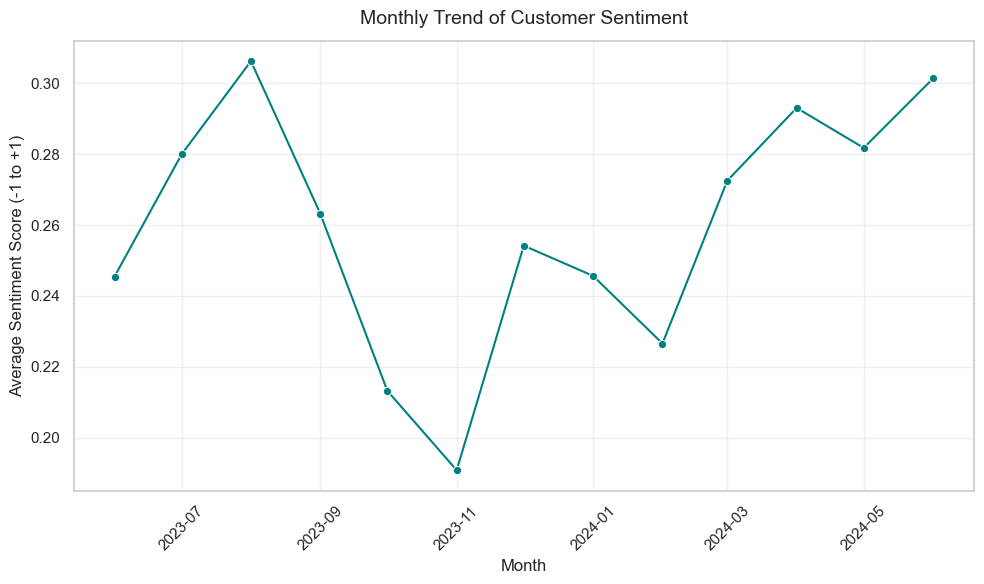

In [31]:
# 1 — Ensure ReviewDate is datetime
df["ReviewDate"] = pd.to_datetime(df["ReviewDate"], errors="coerce")


# 2 — Clean SentimentScore (remove invalid values)
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna(subset=["SentimentScore"])


# 3 — Create Year–Month column
df["YearMonth"] = df["ReviewDate"].dt.to_period("M")


# 4 — Calculate average sentiment score per month
monthly_trend = (
    df.groupby("YearMonth")["SentimentScore"]
      .mean()
      .reset_index()
)


# 5 — Convert YearMonth back to timestamp for plotting
monthly_trend["YearMonth"] = monthly_trend["YearMonth"].dt.to_timestamp()


# 6 — Create line chart
plt.figure(figsize=(10,6))

sns.lineplot(
    data=monthly_trend,
    x="YearMonth",
    y="SentimentScore",
    marker="o",
    color="teal"
)


# 7 — Titles & Labels
plt.title("Monthly Trend of Customer Sentiment", fontsize=14, pad=12)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average Sentiment Score (-1 to +1)", fontsize=12)


# 8 — Rotate month labels
plt.xticks(rotation=45)


# 9 — Light grid for clarity
plt.grid(alpha=0.3)


# 10 — Adjust layout
plt.tight_layout()


# 11 — Show plot
plt.show()


# Visualization 7
## Number of Reviews per Month (Volume Trend) (Line Chart)
### This answers: How many people are talking about the brand over time?
### How many customers posted reviews each month

C:\Users\ishaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ishaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


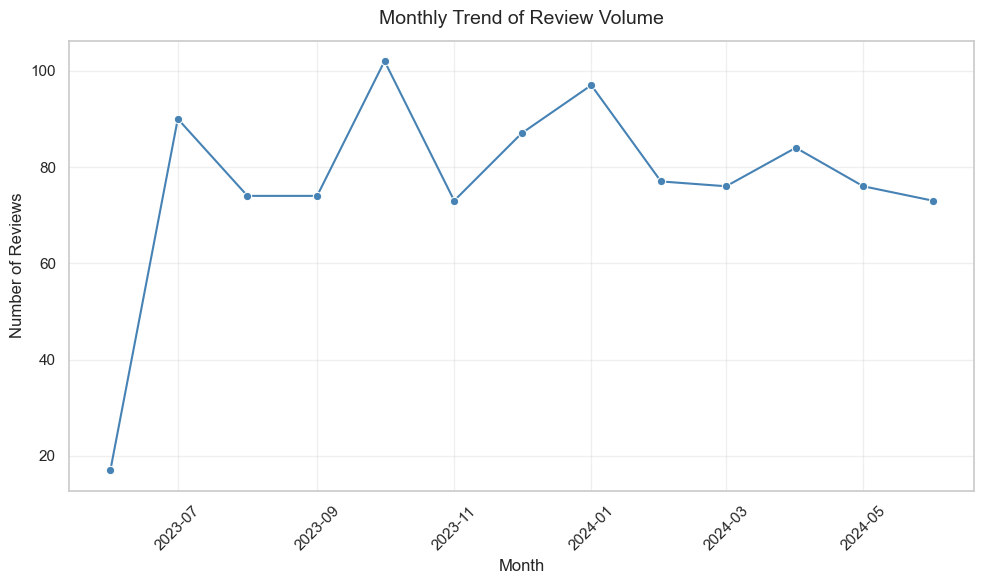

In [33]:
# 1 -count reviews per month
monthly_volume = (
    df.groupby("YearMonth")["ReviewID"]
    .count()
    .reset_index(name="ReviewCount")
)

# 2 - convert period back to timestamp for plotting 
monthly_volume["YearMonth"] = monthly_volume["YearMonth"].dt.to_timestamp()

# 3 - plot line chart
plt.figure(figsize=(10,6))
sns.lineplot(
    data=monthly_volume,
    x="YearMonth",
    y="ReviewCount",
    marker="o",
    color="steelblue"
)

# 4 - Title and Labels
plt.title("Monthly Trend of Review Volume", fontsize=14, pad=12)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Reviews", fontsize=12)

# 5 - rotate labels
plt.xticks(rotation=45)

# 6 - light grid
plt.grid(alpha=0.3)

# 7 - layout adjustment
plt.tight_layout()

plt.show()

# Visualization 8
##  Average Sentiment by Day of Week (Bar Chart)
### This answers: Are customers happier on certain days?

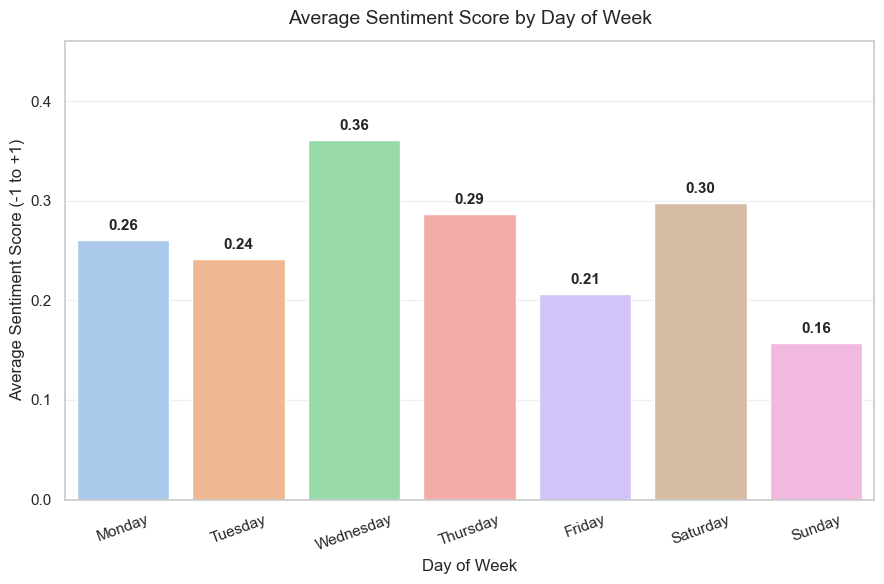

In [37]:
# 1 - define weekday order for logical sorting
weekday_order = [
    "Monday", "Tuesday", "Wednesday",
    "Thursday", "Friday", "Saturday", "Sunday"
]

# 2 - calculate average sentiment per weekday
weekday_sentiment = (
    df.groupby("Weekday")["SentimentScore"]
    .mean()
    .reindex(weekday_order)
    .reset_index()
)

# 3 - create bar chart
plt.figure(figsize=(9,6))
sns.barplot(
    data=weekday_sentiment,
    x="Weekday",
    y="SentimentScore",
    palette="pastel"
)

# 4 - Titles and Labels
plt.title("Average Sentiment Score by Day of Week", fontsize=14, pad=12)
plt.xlabel("Day of Week", fontsize=12)
plt.ylabel("Average Sentiment Score (-1 to +1)", fontsize=12)

# 5 - rotate labels
plt.xticks(rotation=20)

# 6 - add value above bars
for i, value in enumerate(weekday_sentiment["SentimentScore"]):
    if pd.notna(value):
        plt.text(i, value + 0.01, f"{value:.2f}", 
                 ha='center', fontsize=11, fontweight='bold')

# 7 - add y-axis padding
plt.ylim(0, weekday_sentiment["SentimentScore"].max() + 0.1)

# 8 — Light grid
plt.grid(axis="y", alpha=0.3)

# 9 — Fit layout
plt.tight_layout()

# 10 — Show chart
plt.show()

# Visualization 9
## Relationship Between Review Length & Sentiment (Scatter Plot)
### This answers: Do unhappy customers write longer reviews?
### This chart explores customer emotion intensity.

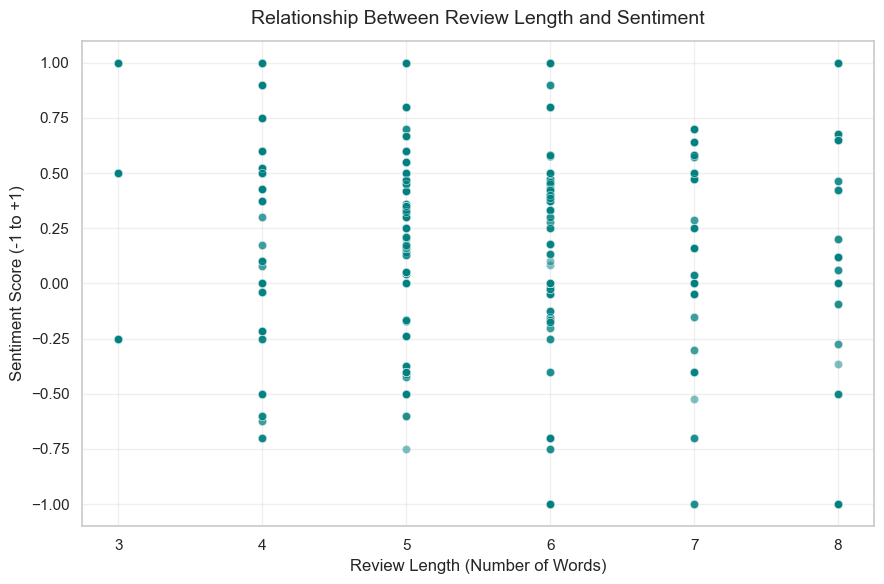

In [40]:
plt.figure(figsize=(9,6))

sns.scatterplot(
    data=df,
    x="ReviewLength",
    y="SentimentScore",
    alpha=0.5,
    color="teal"
)

# Titles & labels
plt.title("Relationship Between Review Length and Sentiment", fontsize=14, pad=12)
plt.xlabel("Review Length (Number of Words)", fontsize=12)
plt.ylabel("Sentiment Score (-1 to +1)", fontsize=12)

# Light grid
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()